In [2]:
import pandas as pd
import nltk
import gensim
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('News_Final.csv')
df.head(11)

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1
5,27790.0,Intellitec Solutions to Host 13th Annual Sprin...,Over 100 attendees expected to see latest vers...,PRWeb,microsoft,2015-03-01 00:19:00,-0.075378,0.036773,-1,-1,-1
6,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",NaN,palestine,2016-02-28 14:03:00,0.000000,-0.005906,0,0,0
7,80762.0,"Obama, stars pay a musical tribute to Ray Charles",First lady Michelle Obama speaks in the State ...,Coast Reporter,obama,2015-03-01 00:45:00,0.083333,0.103003,-1,-1,-1
8,80771.0,Fire claims more than 100-year-old barn in Han...,A Hancock County man lost a barn early Monday ...,WTHR Indianapolis,palestine,2015-03-01 01:20:00,-0.173925,-0.050185,-1,-1,-1
9,27803.0,Microsoft's new Windows 10 ad targets Apple,"New Delhi, Feb.29 : Technology giant Microsoft...",New Kerala,microsoft,2015-03-01 01:32:00,-0.059536,-0.081715,-1,-1,-1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93239 entries, 0 to 93238
Data columns (total 11 columns):
IDLink               93239 non-null float64
Title                93239 non-null object
Headline             93224 non-null object
Source               92960 non-null object
Topic                93239 non-null object
PublishDate          93239 non-null object
SentimentTitle       93239 non-null float64
SentimentHeadline    93239 non-null float64
Facebook             93239 non-null int64
GooglePlus           93239 non-null int64
LinkedIn             93239 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 7.8+ MB


In [5]:
ndf=pd.concat([df[df['Topic']=='microsoft'],df[df['Topic']=='palestine']],axis=0)

In [6]:
#ndf=ndf[(ndf.Facebook>-1) & (ndf.GooglePlus>-1) & (ndf.LinkedIn >-1)]

In [7]:

docs=ndf['Title'][0:5].fillna('').str.lower()
docs=docs.str.replace('[^a-z ]','')
docs

5     intellitec solutions to host th annual spring ...
9              microsofts new windows  ad targets apple
10    microsoft project centennial seen with univers...
11    microsoft sneaks onto android while android sn...
14     hololens dev edition costs  with new conker game
Name: Title, dtype: object

In [8]:
stopwords=nltk.corpus.stopwords.words('english')
stopwords.extend(['use','','will','one','good'])
stemmer=nltk.stem.PorterStemmer()

docs_clean=[]
for doc in docs:
    words=doc.split(' ')
    words_clean= [stemmer.stem(word) for word in words if word not in stopwords]
    words_clean=[word for word in words_clean if word not in stopwords]
    docs_clean.append(words_clean)

In [9]:
dictionary = gensim.corpora.Dictionary(docs_clean) # to get the id for every single word

In [10]:
docs_bow=[]
for doc in docs_clean:
    bow=dictionary.doc2bow(doc)
    docs_bow.append(bow)

In [11]:
lda_model=gensim.models.LdaMulticore(docs_bow,id2word=dictionary,num_topics=4,random_state=100)

In [12]:
topics=[]
for doc in docs_bow:
    new_df=pd.DataFrame(lda_model.get_document_topics(doc),columns=['topics','probs'])
    topic=new_df.sort_values(by='probs').iloc[-1]['topics']
    topics.append(topic)

In [13]:
ndf.shape

(30701, 11)

In [14]:
ndf.shape

(30701, 11)

In [15]:
df[df['Topic']=='microsoft'].shape

(21858, 11)

In [16]:

df[df['Topic']=='palestine'].shape

(8843, 11)

In [17]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30701 entries, 5 to 93237
Data columns (total 11 columns):
IDLink               30701 non-null float64
Title                30701 non-null object
Headline             30697 non-null object
Source               30462 non-null object
Topic                30701 non-null object
PublishDate          30701 non-null object
SentimentTitle       30701 non-null float64
SentimentHeadline    30701 non-null float64
Facebook             30701 non-null int64
GooglePlus           30701 non-null int64
LinkedIn             30701 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 2.8+ MB


In [18]:
ndf.isnull().sum()

IDLink                 0
Title                  0
Headline               4
Source               239
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

In [19]:
ndf.Source.fillna(ndf.Source.mode()[0],inplace=True)

In [20]:
ndf.isnull().sum()

IDLink               0
Title                0
Headline             4
Source               0
Topic                0
PublishDate          0
SentimentTitle       0
SentimentHeadline    0
Facebook             0
GooglePlus           0
LinkedIn             0
dtype: int64

In [21]:
ndf.Topic.value_counts()/30701*100

microsoft    71.196378
palestine    28.803622
Name: Topic, dtype: float64

In [22]:
# to replace null value for heading - need to discuss with the mentor

In [23]:
ndf.dtypes

IDLink               float64
Title                 object
Headline              object
Source                object
Topic                 object
PublishDate           object
SentimentTitle       float64
SentimentHeadline    float64
Facebook               int64
GooglePlus             int64
LinkedIn               int64
dtype: object

In [24]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30701 entries, 5 to 93237
Data columns (total 11 columns):
IDLink               30701 non-null float64
Title                30701 non-null object
Headline             30697 non-null object
Source               30701 non-null object
Topic                30701 non-null object
PublishDate          30701 non-null object
SentimentTitle       30701 non-null float64
SentimentHeadline    30701 non-null float64
Facebook             30701 non-null int64
GooglePlus           30701 non-null int64
LinkedIn             30701 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 2.8+ MB


In [25]:
ndf[['Source','SentimentHeadline']].groupby('Source').agg('median').sort_values(by='SentimentHeadline',ascending=True)

,SentimentHeadline
Source,
KELO AM-FM,-0.604606
Grist,-0.491652
MegaGames,-0.473039
CBS Sports,-0.472456
Yahoo Tech via Yahoo! News,-0.463606
Hackaday,-0.451564
The Market Mogul,-0.438194
Australia-Israel Jewish Affairs Council,-0.434111
The Holmes Report,-0.409159


In [26]:
ndf[['Source','SentimentTitle']].groupby('Source').agg('median').sort_values(by='SentimentTitle',ascending=True)

,SentimentTitle
Source,
KOLO,-0.477297
CBS Sports,-0.472456
Entertainment Weekly,-0.469342
INFORUM,-0.458333
Wilts and Gloucestershire Standard,-0.452267
Anderson Independent Mail,-0.447214
Cloud Computing Intelligence (registration),-0.419166
shanghaidaily,-0.392837
The Connecticut College Voice,-0.355756


In [27]:
ndf[['Topic','SentimentTitle','SentimentHeadline']].groupby('Topic').agg('mean').sort_values(by='SentimentHeadline',ascending=False)

,SentimentTitle,SentimentHeadline
Topic,,
microsoft,0.002359,-0.014744
palestine,-0.020085,-0.044485


In [28]:
ndf['Date']=pd.to_datetime(ndf['PublishDate'])

In [29]:
ndf['month'] = ndf['Date'].dt.month
ndf['day'] = ndf['Date'].dt.day
ndf['year'] = ndf['Date'].dt.year
ndf['month_name'] = ndf['Date'].dt.strftime('%b')
ndf['weekday'] = ndf['Date'].dt.strftime('%A')

In [30]:
ndf['Date'].min(), ndf['Date'].max()

(Timestamp('2015-03-01 00:19:00'), Timestamp('2016-07-07 16:16:11'))

In [31]:

ndf.month_name.value_counts()

Mar    4283
Jan    4211
Dec    3857
May    3678
Jun    3639
Apr    3598
Feb    3511
Nov    3021
Jul     680
Oct     219
Sep       3
Aug       1
Name: month_name, dtype: int64

In [32]:
ndf.weekday.value_counts()

Monday       5672
Tuesday      5638
Wednesday    5421
Thursday     5127
Friday       4287
Sunday       2322
Saturday     2234
Name: weekday, dtype: int64

In [33]:
ndf[['month_name','Topic','IDLink']].groupby(['month_name','Topic']).agg('count')

IDLink
month_name Topic            
Apr        microsoft    2609
           palestine     989
Aug        microsoft       1
Dec        microsoft    2664
           palestine    1193
Feb        microsoft    2396
           palestine    1115
Jan        microsoft    2864
           palestine    1347
Jul        microsoft     492
           palestine     188
Jun        microsoft    2703
           palestine     936
Mar        microsoft    3028
           palestine    1255
May        microsoft    2719
           palestine     959
Nov        microsoft    2259
           palestine     762
Oct        microsoft     123
           palestine      96
Sep        palestine       3

In [34]:
ndf[['month_name','Topic','IDLink']].groupby(['month_name','Topic']).agg('count').sort_values(by='IDLink',ascending=False)

,,IDLink
month_name,Topic,
Mar,microsoft,3028
Jan,microsoft,2864
May,microsoft,2719
Jun,microsoft,2703
Dec,microsoft,2664
Apr,microsoft,2609
Feb,microsoft,2396
Nov,microsoft,2259
Jan,palestine,1347


In [35]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30701 entries, 5 to 93237
Data columns (total 17 columns):
IDLink               30701 non-null float64
Title                30701 non-null object
Headline             30697 non-null object
Source               30701 non-null object
Topic                30701 non-null object
PublishDate          30701 non-null object
SentimentTitle       30701 non-null float64
SentimentHeadline    30701 non-null float64
Facebook             30701 non-null int64
GooglePlus           30701 non-null int64
LinkedIn             30701 non-null int64
Date                 30701 non-null datetime64[ns]
month                30701 non-null int64
day                  30701 non-null int64
year                 30701 non-null int64
month_name           30701 non-null object
weekday              30701 non-null object
dtypes: datetime64[ns](1), float64(3), int64(6), object(7)
memory usage: 4.2+ MB


In [36]:
ndf['GooglePlus'].value_counts()

 0       15928
 1        3590
-1        2690
 2        1980
 3        1257
 4         838
 5         663
 6         449
 7         377
 8         291
 9         242
 10        212
 11        189
 12        158
 13        147
 15        111
 14        105
 17         81
 18         73
 21         65
 16         64
 19         62
 20         59
 22         56
 23         52
 24         45
 26         37
 25         36
 27         34
 28         32
         ...  
 281         1
 212         1
 247         1
 244         1
 436         1
 117         1
 165         1
 197         1
 134         1
 150         1
 214         1
 230         1
 103         1
 135         1
 231         1
 263         1
 201         1
 367         1
 423         1
 88          1
 104         1
 152         1
 168         1
 216         1
 392         1
 504         1
 1016        1
 121         1
 169         1
 407         1
Name: GooglePlus, Length: 204, dtype: int64

In [37]:
ndf['Topic'] = ndf['Topic'].str.lower().str.replace('[^a-z#@ ]', '')
ndf['microsoft'] = ndf['Topic'].apply(lambda v: 1 if 'microsoft' in v.split(' ') else 0)
ndf['microsoft'].value_counts()

1    21858
0     8843
Name: microsoft, dtype: int64

In [38]:
ndf['palestine'] = ndf['Topic'].apply(lambda v: 1 if 'palestine' in v.split(' ') else 0)

In [39]:
ndf=ndf[(ndf.Facebook>-1)&(ndf.GooglePlus>-1)&(ndf.LinkedIn>-1)]

In [40]:
ndf

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Date,month,day,year,month_name,weekday,microsoft,palestine
726,311.0,Microsoft offering £100 discount on original B...,Just ahead of the market rollout of Microsoft'...,International Business Times via Yahoo UK & Ir...,microsoft,2015-11-08 05:25:00,0.000000,-0.132812,0,0,0,2015-11-08 05:25:00,11,8,2015,Nov,Sunday,1,0
729,307.0,Microsoft scales back free online storage plans,NEW YORK — Microsoft is getting stingy with on...,The Columbian,microsoft,2015-11-08 06:54:00,0.106303,-0.207333,0,0,0,2015-11-08 06:54:00,11,8,2015,Nov,Sunday,1,0
732,299.0,Microsoft’s OneDrive debacle shows its cloud c...,When Microsoft announced earlier this week tha...,Digital Trends via Yahoo! News,microsoft,2015-11-08 12:15:00,-0.166139,-0.259052,6,0,1,2015-11-08 12:15:00,11,8,2015,Nov,Sunday,1,0
738,328.0,Microsoft to play a big part in Digital India,"Bhaskar Pramanik, Chairman, Microsoft India, s...",DNA India,microsoft,2015-11-08 16:47:00,-0.018326,0.062500,11,1,1,2015-11-08 16:47:00,11,8,2015,Nov,Sunday,1,0
740,587.0,Microsoft risks IT ire with Windows 10 update ...,Microsoft has made it clear that it will take...,MIS Asia,microsoft,2015-11-08 18:54:00,-0.165728,0.146390,89,0,0,2015-11-08 18:54:00,11,8,2015,Nov,Sunday,1,0
742,476.0,Microsoft readies its next major Windows 10 Fa...,Microsoft is on the verge of issuing its first...,SiliconANGLE,microsoft,2015-11-08 21:50:00,0.004360,0.210430,4,2,4,2015-11-08 21:50:00,11,8,2015,Nov,Sunday,1,0
759,116.0,"Microsoft Analytics, Intel IoT, Spokeo Vs. Rob...",Microsoft updated its CRM and SQL offerings an...,InformationWeek,microsoft,2015-11-09 00:00:00,0.037881,0.225037,49,16,57,2015-11-09 00:00:00,11,9,2015,Nov,Monday,1,0
760,119.0,Microsoft adds new tools for reporting spammy ...,If you spend enough time browsing the Windows ...,PCWorld,microsoft,2015-11-09 00:00:00,-0.046117,-0.012500,54,3,8,2015-11-09 00:00:00,11,9,2015,Nov,Monday,1,0
761,125.0,How to get over not getting a Microsoft Surfac...,You'd think they'd know you want a Microsoft S...,CNET,microsoft,2015-11-09 00:00:00,-0.414578,0.000000,151,55,370,2015-11-09 00:00:00,11,9,2015,Nov,Monday,1,0
762,127.0,First impressions: Microsoft Surface Pro 4 com...,Microsoft CEO Satya Nadella was in Mumbai to g...,Firstpost,microsoft,2015-11-09 00:00:00,0.276699,-0.033522,0,0,0,2015-11-09 00:00:00,11,9,2015,Nov,Monday,1,0


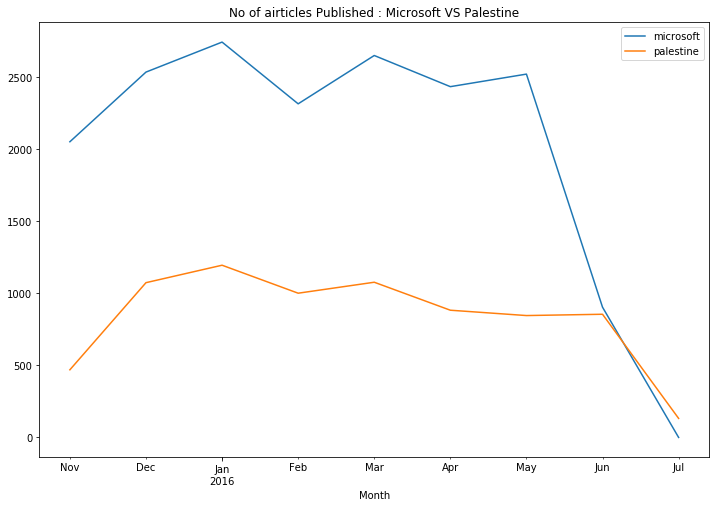

In [41]:
# Topics per month comparison

plt.figure(figsize=(12,8))
ndf.index = ndf['Date']
ndf.resample('1M')['microsoft'].sum().plot.line()
ndf.resample('1M')['palestine'].sum().plot.line()
plt.legend()
plt.xlabel("Month")
plt.title('No of airticles Published : Microsoft VS Palestine')
plt.show()

In [69]:
y=ndf.month_name.value_counts()
y

Jan    3935
Mar    3724
Dec    3606
May    3364
Apr    3314
Feb    3313
Nov    2519
Jun    1757
Jul     132
Name: month_name, dtype: int64

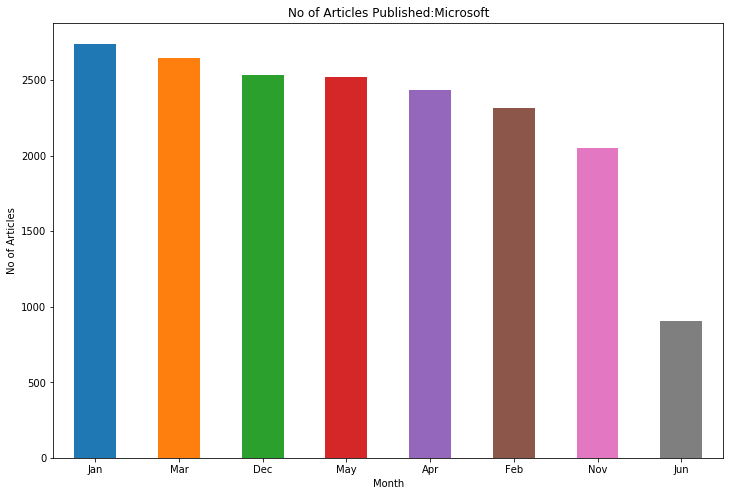

In [84]:
plt.figure(figsize=(12,8))
ndf[ndf.Topic=='microsoft'].month_name.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Month')
plt.ylabel('No of Articles')
plt.title('No of Articles Published:Microsoft')
plt.show()

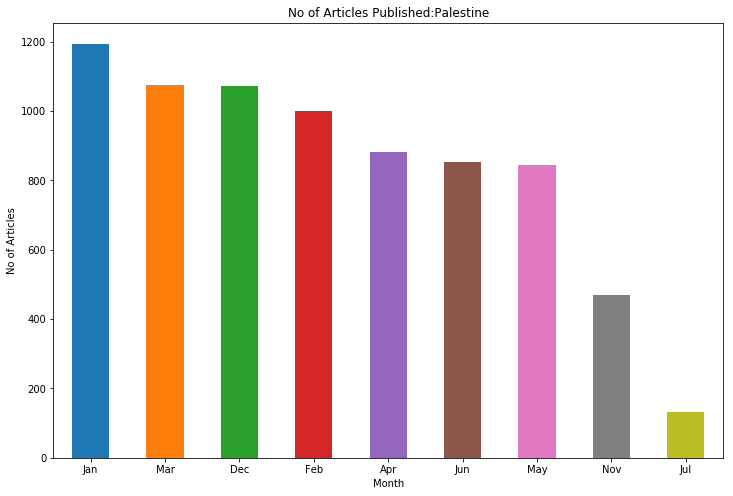

In [83]:
plt.figure(figsize=(12,8))
ndf[ndf.Topic=='palestine'].month_name.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Month')
plt.ylabel('No of Articles')
plt.title('No of Articles Published:Palestine')
plt.show()

In [44]:
ndf['PublishDate'] = ndf.PublishDate.astype('str')
ndf['Date'] = ndf['PublishDate'].str[0:7]
ndf['Date'] = pd.to_datetime(ndf['Date'])
ndf.head(2)

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Date,month,day,year,month_name,weekday,microsoft,palestine
Date,,,,,,,,,,,,,,,,,,,
2015-11-08 05:25:00,311.0,Microsoft offering £100 discount on original B...,Just ahead of the market rollout of Microsoft'...,International Business Times via Yahoo UK & Ir...,microsoft,2015-11-08 05:25:00,0.000000,-0.132812,0,0,0,2015-11-01,11,8,2015,Nov,Sunday,1,0
2015-11-08 06:54:00,307.0,Microsoft scales back free online storage plans,NEW YORK — Microsoft is getting stingy with on...,The Columbian,microsoft,2015-11-08 06:54:00,0.106303,-0.207333,0,0,0,2015-11-01,11,8,2015,Nov,Sunday,1,0


Sentiment Title



C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'Date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


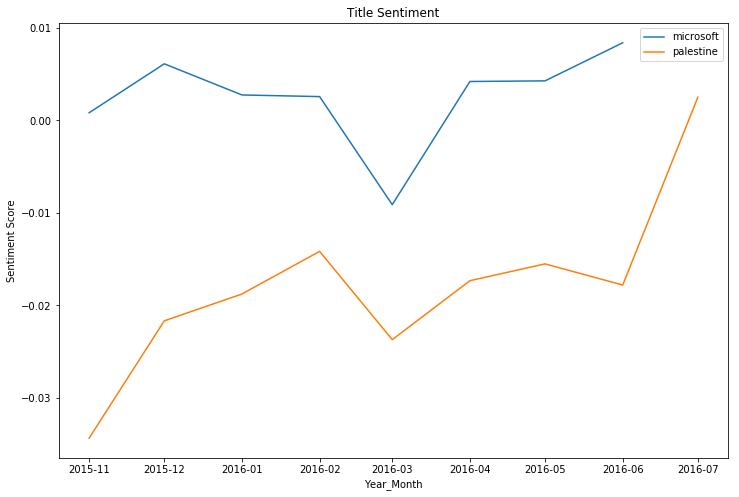

Sentiment HeadLine



C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 'Date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version


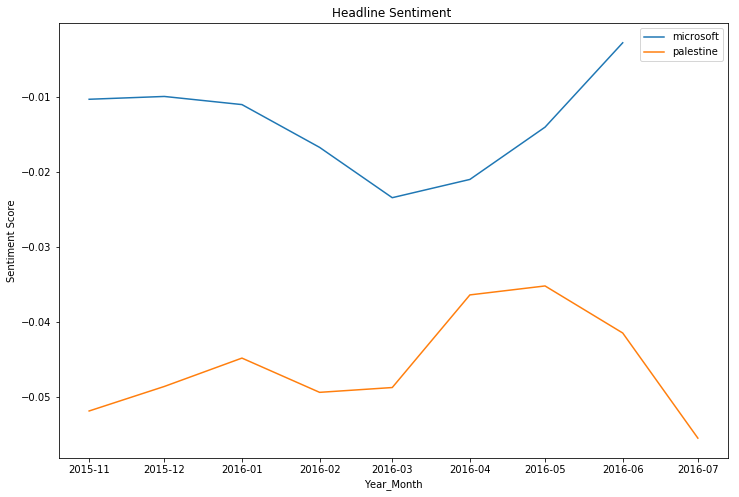

In [45]:

# avarage sentiments of economy and obama
plt.figure(figsize=(12,8))
print('Sentiment Title\n')
for i in ndf.Topic.unique():
    plt.plot(ndf[ndf['Topic']==i].groupby(['Date']).SentimentTitle.mean(),label=i)
plt.xticks(rotation=0)
plt.xlabel('Year_Month')
plt.ylabel('Sentiment Score')
plt.title('Title Sentiment')
plt.legend()
plt.show()


plt.figure(figsize=(12,8))
print('Sentiment HeadLine\n')
for i in ndf.Topic.unique():
    plt.plot(ndf[ndf['Topic']==i].groupby(['Date']).SentimentHeadline.mean(),label=i)
plt.xticks(rotation=0)
plt.xlabel('Year_Month')
plt.ylabel('Sentiment Score')
plt.title('Headline Sentiment ')
plt.legend()
plt.show()